#  Question 3 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
# import necessary modules
import matplotlib.pyplot as plt 
import numpy as np
from numpy import linalg as la

In [2]:
# use LaTeX, set global settings for plots 
plt.rc('font', family='serif')
plt.rc('font', size=16)
plt.rc('legend', fontsize=16)
plt.rc('legend', frameon=True)
#plt.rc('xtick.major', pad=7)
#plt.rc('xtick.minor', pad=7)
plt.rc('text', usetex=True)
plt.rc('legend', numpoints=1)
#plt.rc('legend', handlelength=1.5)
#plt.rc('lines', lw=1.5)

# Part A

In this question we will extend the work from Q2 to an arbitrary number of particles. First we must modify our code. A pseudocode is written below, with the actual code and results for N=16 particles following afterwards.

Pseudocode for updating positions using the Verlet Method:

1. Define function to calculate accelerations given positions of 2 particles}

    1. Use same function from Q2
    
2. Define function to sum over all particles and calculate forces from function in step 1

    1. Loop over all (other) particles
    
    2. Add force from each other particle to a sum for each particle
    
    3. Append each sum to a list, and return total list for N particles
    
3. Define function to iteratively solve function for N particles

    1. Take as inputs initial positions and velocities
    
    2. Initialize lists to store newly caluclates positions and velocities on each loop
    
        1. Shape lists to allow for new dimension (N particles, step, 2d)
        
    3. Calculate first acceleration to be used in eq 1 (firt step of Verlet)
    
    4. Compute eq 1 (first step of Verlet) and store in temporary v_half value
    
    5. Loop for all time
    
        1. Calculate next positions with eq 2 (second step of Verlet)
        
        2. Calculate new accelerations to be used for eq 3 (third step of Verlet)
        
        3. Calculate eq 3 (third step of Verlet) and store in temporary value k
        
        4. Calculate next velocities with eq 4 (fourth step of Verlet)
        
        5. Update v_half value with eq 5 (fifth step of Verlet)
        
        6. Store updated position and velocity values in lists
        
    6. Return lists with all the updated positions and velocities
    
3. Define a time array on which to perform calculations

4. Define arrays for intial positions and velocities

    1. Set initial positions of particles to be in a 2-d $4 \times 4$ grid using an array for $x$ values and another for $y$ values
    
    2.  Set initial velocities to be 0 using arrays of same shape
    
5. Call function in step 3 with initial positions and velocities

6. Plot results in a for loop for each entry in returned array


In [3]:
def LennardJonesEOM(r1,r2):
    ''' Calculates the acceleration of each particle through EOM
    INPUT: position vector arrays of both particles 
            r1=(x1,y1),r2=(x2,y2)
    OUTPUT: acceleration array of single particle (-ve difference)'''

    # calculate distance vector and norm
    rvec = (r1-r2) # distance vector
    r = la.norm(rvec) # norm of distance vector (sqrt(x^2+y^2))
    
    # Now perform calculations according to equations of motion
    
    a = 12/r*(2*(1/r**13) - (1/r**7))*rvec
    return a

In [4]:
def f_tot(f, r_all):
    ''' Calculates the TOTAL force on all particles, summing over
    all other particles in the domain
    INPUT: f: force function for which to sum over particles,
           r_all: array of particle positions
    OUTPUT: total force (vector) on particle '''
    
    N = len(r_all) # save number of particles
    f_all = [] # initiate list to store forces
    
    for i in range(N): # loop over all particles
        f_sum = np.array([0.,0.]) # initiate sum
        for j in range(N): # sum over all particles
            if j != i: # ignore self-forces
                f_sum += f(r_all[i], r_all[j])
        f_all.append(f_sum) # add total force to list
        
    return np.array(f_all) 

# Note: this is inefficient. If we wanted to do better we could save
# a calculation for the other particle and put a -ve on it... but
# we'll say this is good enough for now

In [5]:
def Verlet(f,tpoints,r_init,v_init):
    '''Function to iteratively solve an ODE using Verlet Method
    INPUT: f (ODE to solve called by f_tot), tpoints (array of time values),
            r (Nx2 array of N particles' initial x&y positions),
            v (Nx2 array of N particles' initial x&y velocities)
    OUTPUT: rpoints (Nxlen(tpoints)x2? list of N particles' x&y positions), 
            vpoints (Nxlen(tpoints)x2? list of N particles' x&y velocities)'''
    
    r = np.copy(r_init)
    v = np.copy(v_init)
    Npart = len(r) # number of particles
    
    # position and velocity lists with initial values
    rpoints = np.reshape(np.copy(r),(Npart, 1, 2)).tolist()
    vpoints = np.reshape(np.copy(v),(Npart, 1, 2)).tolist()
# we do this so that we can stack succesive positions and velocities FOR EACH particle
    
    # We will now loop through the Verlet equations, storing 
    # values as necessary. When on first iteration, must do 
    # additional calculation of v(t0 +1/2h) according to equation 1
    a = f_tot(f,r) # calculate initial accelerations (t=0)
    v_half = v + 0.5*h*a # equation 1 (t=0)
    
    for t in tpoints[:-1]: # Loop for all times
    # note: we stop at last t to keep same dimensions in r
        r += h*v_half # equation 2 (calculate next rs)
        a = f_tot(f,r) # calculate accelerations
        k = h*a # equation 3
        v = v_half + 0.5*k # equation 4 (calculate next vs)
        v_half += k # equation 5   
        
        # Save new positions for EACH particle in corresponding sub-array
        for i in range(Npart):
            rpoints[i].append(np.copy(r)[i])
            vpoints[i].append(np.copy(v)[i])
        # note: this is also inefficient and could be improved

    return np.array(rpoints), np.array(vpoints)

We are now ready to plot some trajectories. First we will define a time array and then set up our arrangement of particles.

In [6]:
h = 0.01 # time step
N = 1000 # number of steps
t0 = 0 # initial time
tmax = h*N # Calculate Final time
tpts = np.arange(t0,tmax,h) # Create array of time values

In [7]:
# Set Initial positions of particles:
N = 16 # set initial number of particles
Lx = 4.0 # set width of box
Ly = 4.0
dx = Lx/np.sqrt(N) # set spacing of particles
dy = Ly/np.sqrt(N)
x_grid = np.arange(dx/2, Lx, dx) # set x positions of particles
y_grid = np.arange(dy/2, Ly, dy) # set y positions of particles
xx_grid, yy_grid = np.meshgrid(x_grid, y_grid) # make the grid
x_initial = xx_grid.flatten() # flatten grid to make single x array
y_initial = yy_grid.flatten() # same for y positions

# Zip x and y positions together to get r vectors as before
r_initial = np.array(list(zip(x_initial,y_initial)))

# Set initial velocities (all to 0)
v_initial = np.zeros(np.shape(r_initial))

It's all set up. Now let's do the actual calculation and see what we get!

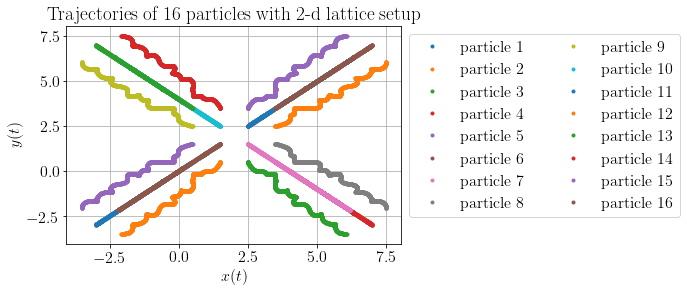

In [8]:
# Perform calculation using functions defined above
r, v = Verlet(LennardJonesEOM, tpts, r_initial, v_initial)

# Plot the result
for i in range(len(r)):
    plt.plot(r[i][:,0], r[i][:,1], '.', 
             label = 'particle {0}'.format(i+1))
plt.title(r'Trajectories of 16 particles with 2-d lattice setup')
plt.xlabel(r"$x(t)$")
plt.ylabel(r'$y(t)$')
plt.legend(ncol=2, bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()

The result of the simulation is clear - the particles are all pushed away from each other and fly away towards the outside of the domain in opposite directions. Relating to Q2, we know this is because the initial spacing between the particles was too small, meaning the repulsive term dominated the potential.

Note: Python ran out of colours to label all of the particles, so the legend isn't very informative. Either way, the particles are indistinguishable, and so one should simply be content by realizing that different colours correspond to different particles.

# Part B

Now we want to compute the energy of the system. To do this we will independently compute the potential and kinetic energies, then sum the result. We can compute the kinetic energies for each time step directly from the outputted velocity array. We define a function to do this below:

In [9]:
def kinetic(v_array):
    time = len(v_array[0]) # save dimensions
    numpart = len(v_array)
    # initiate list to store kinetic energy at each time step
    totenergy = []
    # loop over all time steps
    for t in range(time):
        energy = 0. # value to sum all particles' energies
        # loop over all particles
        for n in range(numpart):
            # extract the current time's element (tuple of velocity)
            v = v_array[n][t]
            # calculate v^2
            vsquared = v[0]**2 + v[1]**2
            energy += 0.5*vsquared # add energy to sum
        # append total energy for timestep to list
        totenergy.append(energy)
    return np.array(totenergy)

The potential energy is more difficult, and will require the definition of three independent functions. First we need a function to calculate the potential between any two particles as given by the Lennard Jones potential. Then we need a function to compute the TOTAL potential on each particle due to all other particles at a particular time step. This is done by summing over all the other particles. Finally we need a third function to sum over all time steps, and add the potentials for all N particles into a single master list.

NOTE: This method is VERY inneficient, as we are ignoring symmetries between potentials and computing the same quantities several times. However overall it won't affect our timing too drastically, and at least the definition of these three different functions allows us to generalize and look at potentials for single particles should we be interested.

In [10]:
# Here we define a function to calculate the potential between points
def LennardJonesPOT(r1,r2):
    ''' Calculates the Lennard Jones potential between two particles
    INPUT: position vector arrays of both particles 
            r1=(x1,y1),r2=(x2,y2)
    OUTPUT: Potential between two positions'''

    # calculate norm of distance vector
    r = la.norm(r1-r2) # norm of distance vector (sqrt(x^2+y^2))
    
    # Now perform calculations according to Lennar Jones potential
    pot = 2*((1/r**12) - (1/r**6))
    return pot

# To sum over all particles (i.e. get potential for a single particle
# due to all other particles, we need to define a similar function as 
# f_tot (but now we will work with scalar quantities)
def e_tot(f, r_array,t):
    ''' Calculates the TOTAL force on all particles, summing over
    all other particles in the domain
    INPUT: f: potential function for which to sum over particles,
           r_all: array of particle positions, t: current time step
    OUTPUT: list total potential on particle '''
    
    N = len(r_array) # save number of particles
    e_all = [] # initiate list to store forces
    for i in range(N): # loop over all particles
        e_sum = 0.0 # initiate sum
        for j in range(N): # sum over all other particles
            if j != i: # ignore self-potential
                e_sum += f(r_array[i][t], r_array[j][t])
        e_all.append(e_sum) # add total potential to list
    return np.array(e_all) 

# Final function to loop over time steps and add all potentials
def potential(r_array):
    time = len(r_array[0]) # save time dimension
    # initiate list to store potential energy at each time step
    totenergy = []
    # loop over all time steps
    for t in range(time):
        # call e_tot to loop over all particles, then
        # sum total potential energy at each time step
        energy = np.sum(e_tot(LennardJonesPOT,r_array,t))
        # append total potential energy to master list
        totenergy.append(energy)
    # we divide total sum by 2 becasue W = 0.5 * sum(V_i)
    return 0.5*np.array(totenergy)

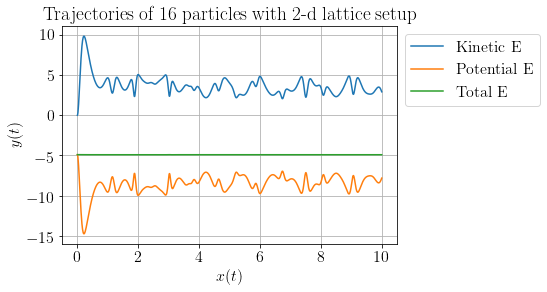

In [11]:
# Plot the result
pot = potential(r) # compute potential energies
kin = kinetic(v) # compute kinetic energies
tot = pot + kin # compute total energy

plt.plot(tpts, kin, label = 'Kinetic E')
plt.plot(tpts, pot, label = 'Potential E')
plt.plot(tpts, tot, label = 'Total E')
plt.title(r'Trajectories of 16 particles with 2-d lattice setup')
plt.xlabel(r"$x(t)$")
plt.ylabel(r'$y(t)$')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()

Hallejuah! We see that the Kinetic and Potential energies perfectly cancel, conserving energy in our system. To quantify the energy conservation, we will find the maximum value of the relative error, i.e. $max(\frac{|E(0)-E(t)|}{E(0)}) = max(\frac{|K_E(0) + P_E(0) - K_E(t) + P_E(t)|}{K_E(0) + P_E(0)})$

In [12]:
E0 = tot[0]
Emax = max(abs(E0 - tot))/abs(E0)
print('Maximum relative error = ', Emax)

Maximum relative error =  0.00302024458549


Confirmed! We find that our total energy is conserved to within 0.3% of our initial value! Yay physics works.

# Part C

For the final section, we want to implement periodic boundary conditions to simulate a real lattice structure! This part is going to be a little tricky, and will involve modifying our Verlet function. Essentially we want to check after each time step whether a particle has exited the domain, and if it has we put it back in at the opposite side of the box. To do this we use $\texttt{np.mod}$. We make the crude approximation that only the 8 neighboring tiles matter because of the quickly decaying potential. The first step is to define a function capable of summing the external forces (i.e. the forces we computed in part A but for all neighboring tiles). We then modify the Verlet equation accordingly. I copied the original Verlet equation from above, and commented the modifications made.

In [13]:
def f_ext(f, r, L_ext):
    """Calculates forces from neighboring tiles
    INPUT: function to calculate accelerations,
           position vectors from proper domain, 
           position vectors from neighboring (image) tiles
    OUTPUT: All external forces (array of 2d arrays) """
    f_sum_tot = [] # initiate list
    for rN in r: # loop over positions of proper particles
        outer_sum=0 # initialize sum
        for Li in L_ext: # loop over neighboring tiles
            inner_sum = 0 # initialize sum
            for Lij in Li: # loop over image particles in tile
                # calculate accelerations and add to sum
                inner_sum += f(rN, Lij)
            # sum total acceleration for each tile
            outer_sum += inner_sum
        # sum overall external acceleration for each particle
        # and append to list, return as array
        f_sum_tot.append(outer_sum)
    return np.array(f_sum_tot)
      

def VerletPeriodic(f,tpoints,r_init,v_init,Lx,Ly):
    '''Function to iteratively solve an ODE using Verlet Method
    INPUT: f (ODE to solve called by f_tot), tpoints (array of time values),
            r (Nx2 array of N particles' initial x&y positions),
            v (Nx2 array of N particles' initial x&y velocities),
            Lx, Ly (dimensions of box)
    OUTPUT: rpoints (Nxlen(tpoints)x2 list of N particles' x&y positions), 
            vpoints (Nxlen(tpoints)x2 list of N particles' x&y velocities)'''
    
    r = np.copy(r_init)
    v = np.copy(v_init)
    Npart = len(r) # number of particles
    
    # position and velocity lists with initial values
    rpoints = np.reshape(np.copy(r),(Npart, 1, 2)).tolist()
    vpoints = np.reshape(np.copy(v),(Npart, 1, 2)).tolist()
# we do this so that we can stack succesive positions and velocities FOR EACH particle
    
# >> ADDING ################################################################    
    # Copy particles into extended domain for periodic boundary condition
    # L1 corresponds to image particles in top left corner box, etc.
    L1 = r + np.full_like(r_init, [-Lx, Ly])
    L2 = r + np.full_like(r_init, [0, Ly]) 
    L3 = r + np.full_like(r_init, [Lx, Ly]) 
    L4 = r + np.full_like(r_init, [-Lx, 0]) 
    # L5 = r,  centre box is the 'proper' domain
    L6 = r + np.full_like(r_init, [Lx, 0]) 
    L7 = r + np.full_like(r_init, [-Lx, -Ly]) 
    L8 = r + np.full_like(r_init, [0, -Ly]) 
    L9 = r + np.full_like(r_init, [Lx, -Ly]) 
    
    # Put it all together : all initial positions of image particles
    L_ext_init = np.array([L1, L2, L3, L4, L6, L7, L8, L9])     
# >> END ADDING ############################################################    
    
    # We will now loop through the Verlet equations, storing 
    # values as necessary. When on first iteration, must do 
    # additional calculation of v(t0 +1/2h) according to equation 1
    a = f_tot(f,r) # calculate initial accelerations (t=0)
# << REMOVE #v_half = v + 0.5*h*a # equation 1 (t=0) #######################
# >> ADDING ################################################################ 
    # include external forces in the acceleration
    v_half = v + 0.5*h*(a + f_ext(LennardJonesEOM, r,L_ext_init))
# >> END ADDING ############################################################
    
    
    for t in tpoints[:-1]: # Loop for all times
    # note: we stop at last t to keep same dimensions in r
        r += h*v_half # equation 2 (calculate next rs)
        
# >> ADDING ################################################################        
        r = np.mod(r, Lx) # move particles if outside domain
        # note: we only do it for r,Lx because Lx=Ly
        L1 = r + np.full_like(r, [-Lx, Ly])
        L2 = r + np.full_like(r, [0, Ly]) 
        L3 = r + np.full_like(r, [Lx, Ly]) 
        L4 = r + np.full_like(r, [-Lx, 0]) 
        # L5 = r
        L6 = r + np.full_like(r, [Lx, 0]) 
        L7 = r + np.full_like(r, [-Lx, -Ly]) 
        L8 = r + np.full_like(r, [0, -Ly]) 
        L9 = r + np.full_like(r, [Lx, -Ly]) 
        # Save new external array of particles
        L_ext = np.array([L1, L2, L3, L4, L6, L7, L8, L9])
# >> END ADDING ############################################################                
        
        a = f_tot(f,r) # calculate accelerations
# << REMOVE #k = h*a # equation 3
# >> ADDING ################################################################
        # include external forces in calculation of velocity
        k = h*(a + f_ext(LennardJonesEOM, r, L_ext)) # equation 3
# >> END ADDING ############################################################
        v = v_half + 0.5*k # equation 4 (calculate next vs)
        v_half += k # equation 5   
        
        # Save new positions for EACH particle in corresponding sub-array
        for i in range(Npart):
            rpoints[i].append(np.copy(r)[i]) # do this after definition of r?
            vpoints[i].append(np.copy(v)[i])
        # note: this is also inefficient and could be improved

    return np.array(rpoints), np.array(vpoints)

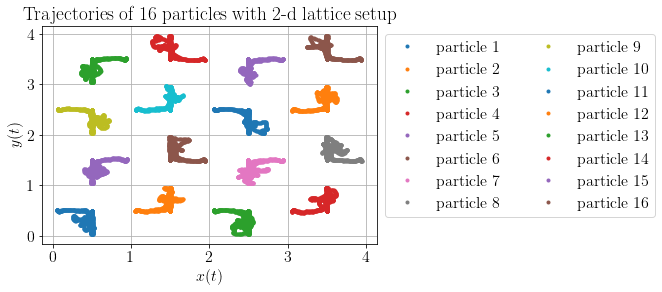

In [14]:
# Perform calculation using functions defined above
r, v = VerletPeriodic(LennardJonesEOM, tpts, r_initial, v_initial,Lx,Ly)

# Plot the result
for i in range(len(r)):
    plt.plot(r[i][:,0], r[i][:,1], '.', 
             label = 'particle {0}'.format(i+1))
plt.title(r'Trajectories of 16 particles with 2-d lattice setup')
plt.xlabel(r"$x(t)$")
plt.ylabel(r'$y(t)$')
plt.legend(ncol=2, bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()

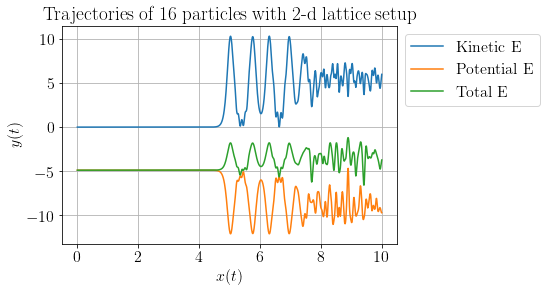

In [15]:
# Plot the result
pot = potential(r) # compute potential energies
kin = kinetic(v) # compute kinetic energies
tot = pot + kin # compute total energy

plt.plot(tpts, kin, label = 'Kinetic E')
plt.plot(tpts, pot, label = 'Potential E')
plt.plot(tpts, tot, label = 'Total E')
plt.title(r'Trajectories of 16 particles with 2-d lattice setup')
plt.xlabel(r"$x(t)$")
plt.ylabel(r'$y(t)$')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.grid(True)
plt.show()

We now see a very different behaviour. For a long period of time (4s), the particles do not move at all! This can be seen in the kinetic energy plot. This makes sense becuase the particles are all equally spaced, and so sit at a local minimum energy distribution. particles are kept localized by the external potential that prevent them from escaping. Our simulation is not perfect, however, and this is demonstrated by our simulation going unstable after 4s. It's not surprising really given the amount of crude estimates we made along the way. Most likely some precision error lead to an instability, which in turn began to vibrate all of the particles. In some sense one might argue that this is more physical because every particle in nature has an internal kinetic energy, and so a lattice of particles will always vibrate. Although that's not really what's causing the vibrations here (its a purely numerical effect), it just my way of reassuring myslef that my work wasnt too bad!